<h1 align="center"><b><font color="green"> Machine Learning Assignment 2</font></b></h1>
<h3 align="right"><font color="blue">-By Mudrika Yaduvanshi</font></h3>

## Problem Statement

Use Machine learning to predict the price of a car based on several characteristics. The objective is to 
build a model to understand the factors that drive the car of the price. This will help your automobile 
company launch their new car in the market effectively by pricing it better.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing data

In [2]:
data=pd.read_csv(r"D:\money\datasets\\AutoData (1).csv")

In [3]:
data.head()

symboling                      make fueltype aspiration doornumber  \
0          3        alfa-romero giulia      gas        std        two   
1          3       alfa-romero stelvio      gas        std        two   
2          1  alfa-romero Quadrifoglio      gas        std        two   
3          2               audi 100 ls      gas        std       four   
4          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  ...  \
0  convertible        rwd          front       88.6      168.8  ...   
1  convertible        rwd          front       88.6      168.8  ...   
2    hatchback        rwd          front       94.5      171.2  ...   
3        sedan        fwd          front       99.8      176.6  ...   
4        sedan        4wd          front       99.4      176.6  ...   

   enginesize  fuelsystem  boreratio stroke compressionratio  horsepower  \
0         130        mpfi       3.47   2.68              9.0         111   
1         130        mpfi       3.47   2.68              9.0         111   
2         152        mpfi       2.68   3.47              9.0         154   
3         109        mpfi       3.19   3.40             10.0         102   
4         136        mpfi       3.19   3.40              8.0         115   

  peakrpm  citympg  highwaympg    price  
0    5000       21          27  13495.0  
1    5000       21          27  16500.0  
2    5000       19          26  16500.0  
3    5500       24          30  13950.0  
4    5500       18          22  17450.0  

[5 rows x 25 columns]

In [4]:
data.shape

(205, 25)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

## Exploratory Data Analysis

In [6]:
data.isnull().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

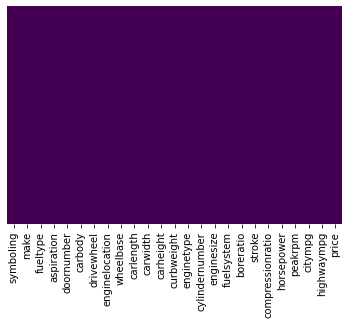

In [7]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

Here we can see our data don't have null values 

Here we have both company name and model in make column so we will firstly extract the company name from make column.

In [8]:
company_name=data["make"].apply(lambda x : x.split(" ")[0])
data.insert(2,"company_name",company_name)

In [9]:
data.head()

symboling                      make company_name fueltype aspiration  \
0          3        alfa-romero giulia  alfa-romero      gas        std   
1          3       alfa-romero stelvio  alfa-romero      gas        std   
2          1  alfa-romero Quadrifoglio  alfa-romero      gas        std   
3          2               audi 100 ls         audi      gas        std   
4          2                audi 100ls         audi      gas        std   

  doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0        two  convertible        rwd          front       88.6  ...   
1        two  convertible        rwd          front       88.6  ...   
2        two    hatchback        rwd          front       94.5  ...   
3       four        sedan        fwd          front       99.8  ...   
4       four        sedan        4wd          front       99.4  ...   

   enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
0         130        mpfi       3.47    2.68              9.0        111   
1         130        mpfi       3.47    2.68              9.0        111   
2         152        mpfi       2.68    3.47              9.0        154   
3         109        mpfi       3.19    3.40             10.0        102   
4         136        mpfi       3.19    3.40              8.0        115   

   peakrpm citympg  highwaympg    price  
0     5000      21          27  13495.0  
1     5000      21          27  16500.0  
2     5000      19          26  16500.0  
3     5500      24          30  13950.0  
4     5500      18          22  17450.0  

[5 rows x 26 columns]

In [10]:
data["company_name"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

There are some company names which are repeating but having some spelling difference .For instance:

- maxda : mazda
- Nissan : nissan
- porsche : porcshce
- toyota : toyouta
- vokswagen : volkswagen : vw

In [11]:
def replace(x,y):
    data.company_name.replace(x,y,inplace=True)

In [12]:
replace("maxda","mazda")
replace("Nissan","nissan")
replace("porcshce","porsche")
replace("volkswagen","vokswagen")
replace("volkswagen","vw")

In [13]:
data["company_name"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'toyouta', 'vokswagen', 'vw', 'volvo'],
      dtype=object)

In [14]:
#plt.rcParams["figure.figsize"]= (25,8)

In [15]:
def plot(a):
    df=data[a]
    df=df.value_counts()
    fig = plt.figure(figsize=(20,5))
    s1=fig.add_subplot(1,1,1)
    
    df.plot(kind="bar",ax=s1)
    plt.title(a)
    plt.xlabel(a)

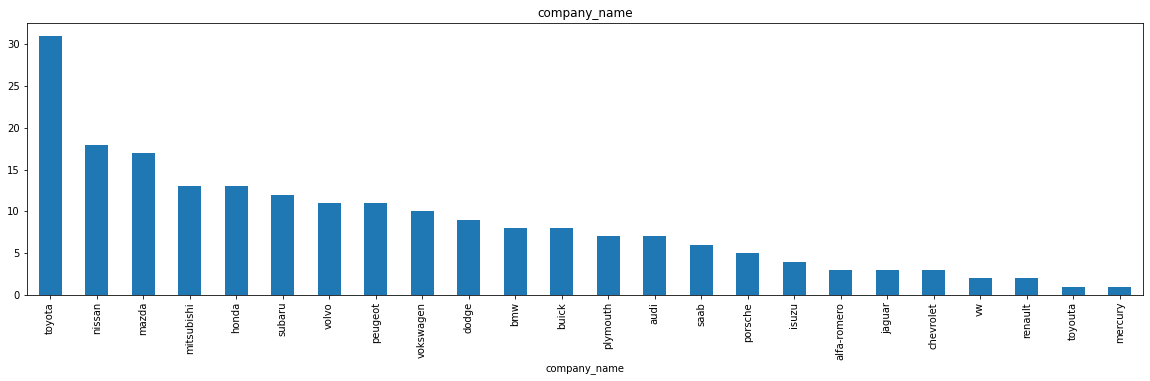

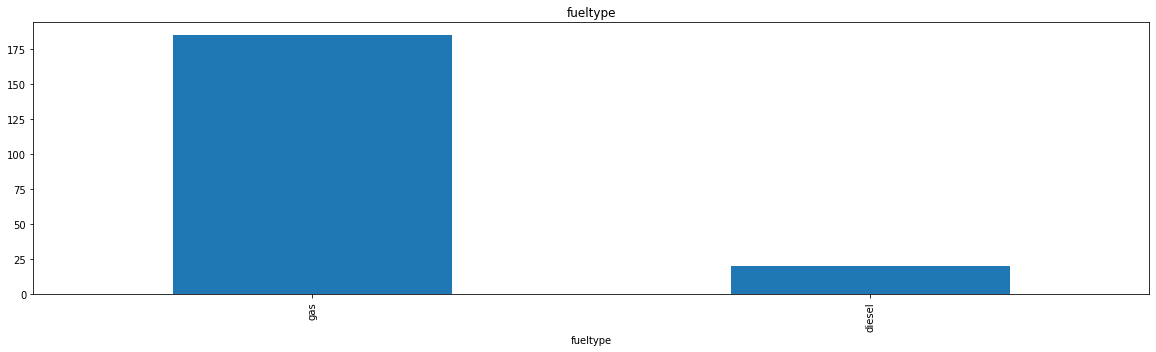

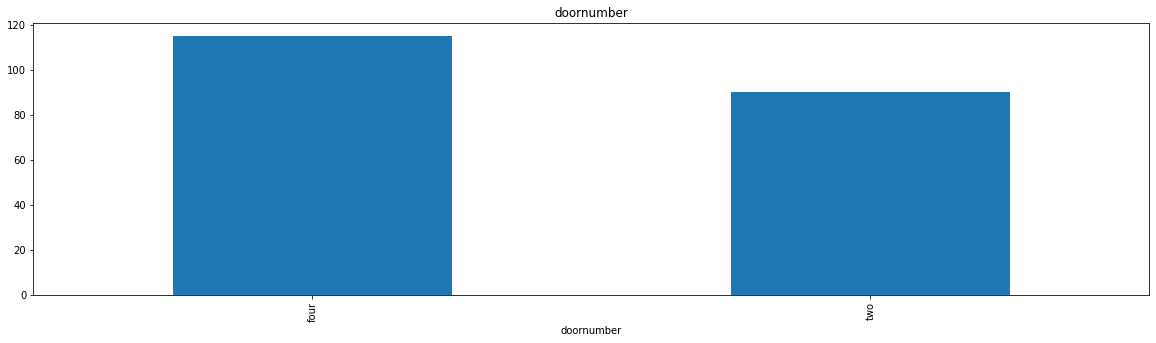

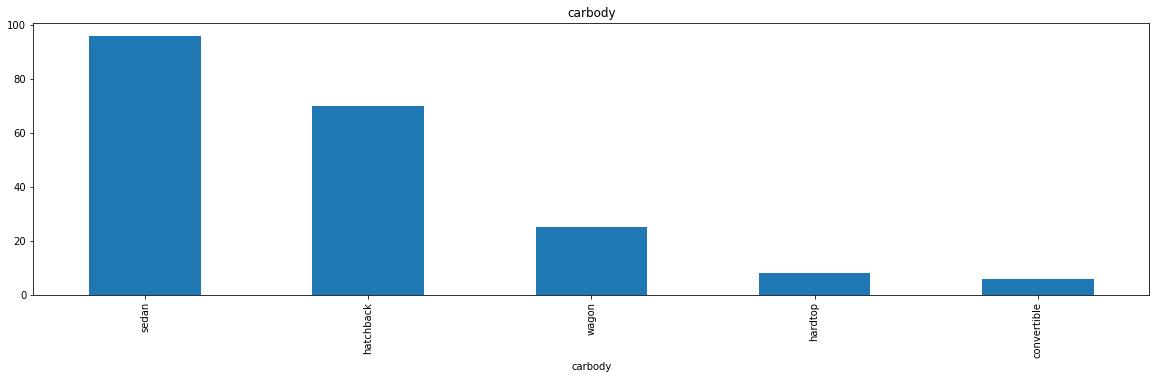

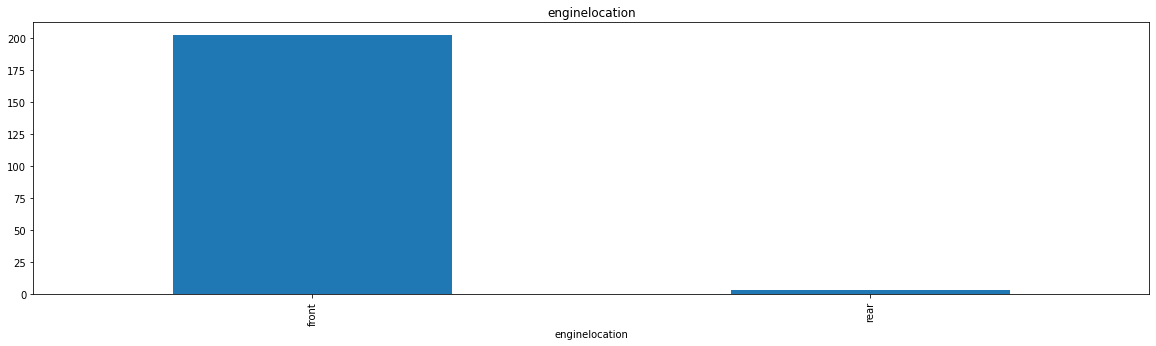

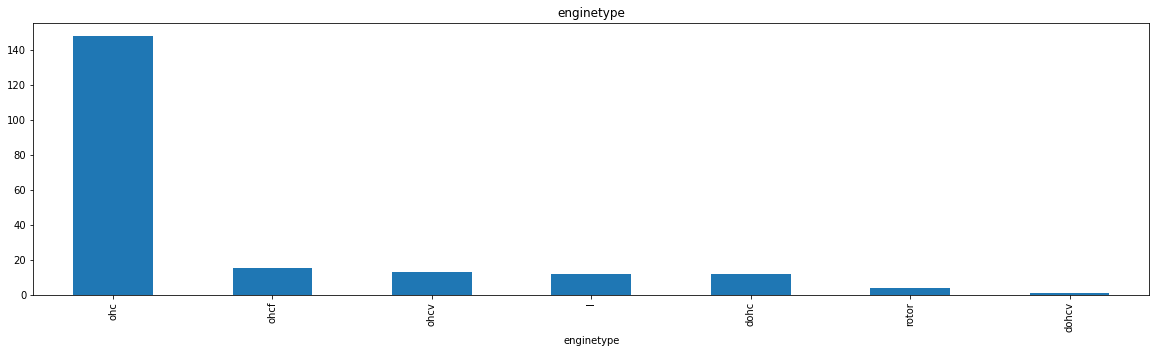

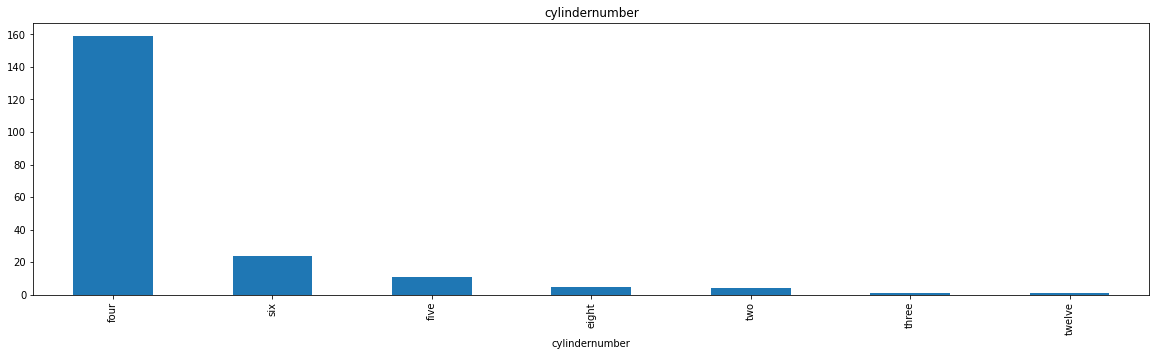

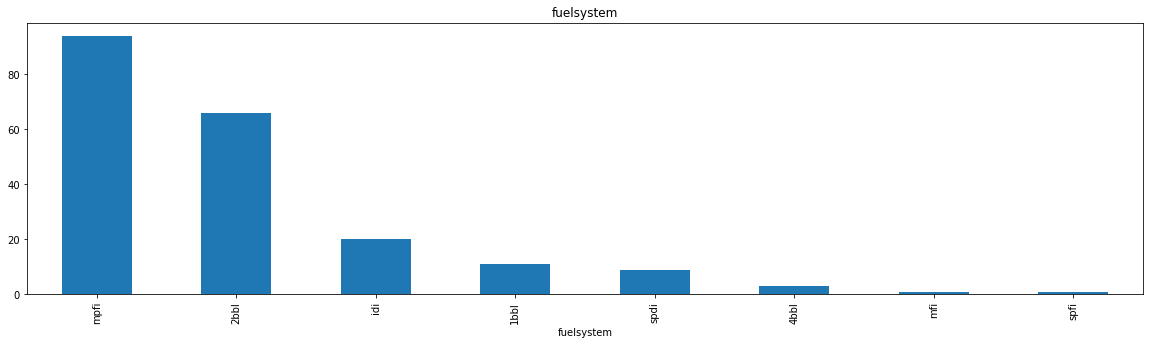

In [16]:
plot("company_name")
plot("fueltype")
plot("doornumber")
plot("carbody")
plot("enginelocation")
plot("enginetype")
plot("cylindernumber")
plot("fuelsystem")

- toyota is in maximum demand.
- The gas fueltype cars are in most demand.
- Cars with four doors are more in demnd than that of cars with two doors.
- Sedan carbody is most preferrable
- Most of the buyers prefer front engine .very few preferred rear engine cars.
- Most of the selled cars have ohc type of engines
- The cars having four cylinders are most common

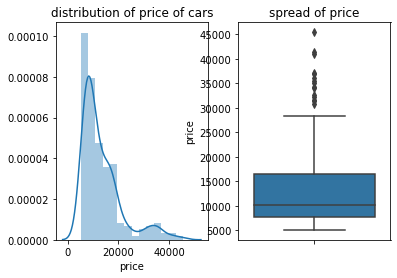

In [17]:
plt.subplot(1,2,1)
plt.title("distribution of price of cars")
sns.distplot(data["price"])
plt.subplot(1,2,2)
plt.title("spread of price")
sns.boxplot(y="price",data=data)

The distplot clearly shows that the distribution is rightly skewed that means that most the cars in demand is having low price in between 5000-20000

In [18]:
def comparision_plot(a,b):    
    fig1=plt.figure(figsize=(20,5))
    s2=fig1.add_subplot(1,1,1)
    
    sns.barplot(x=a,y=b,ax=s2,data=data)
    plt.title(a+" v/s price")
    sns.set_style("whitegrid")

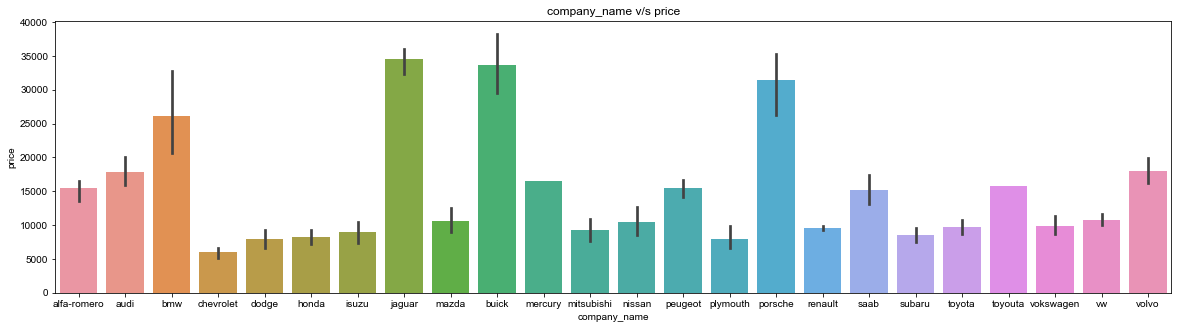

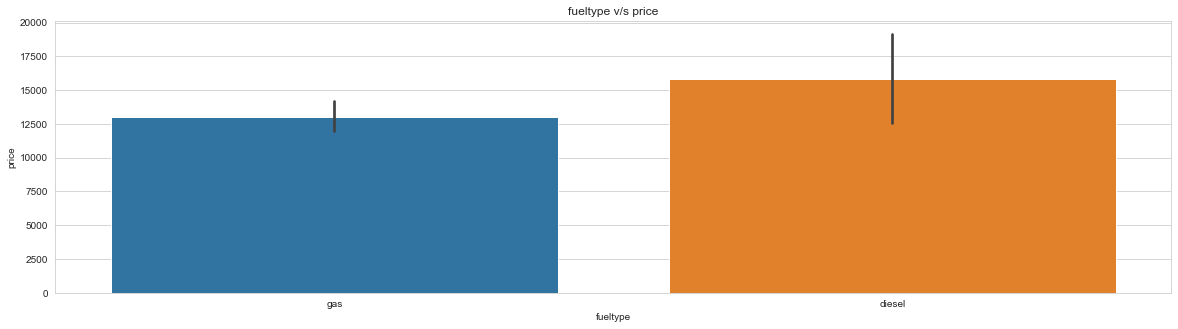

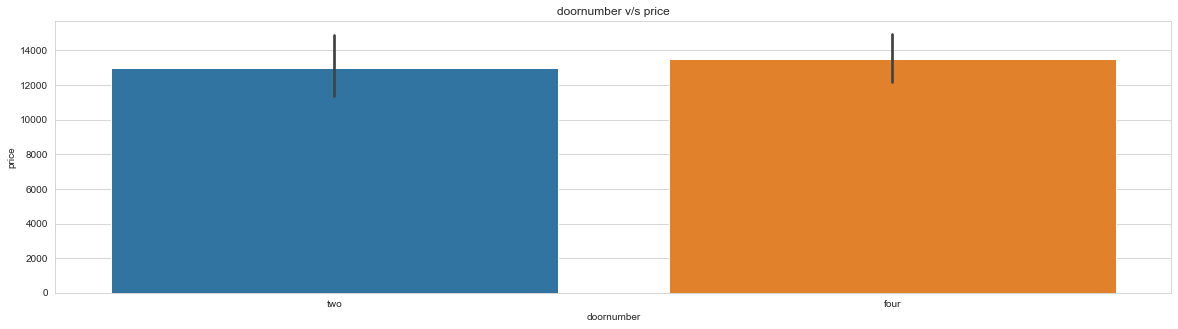

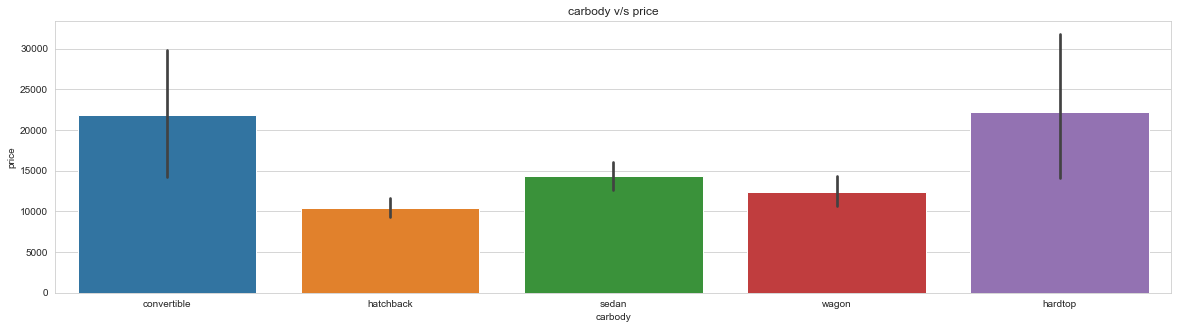

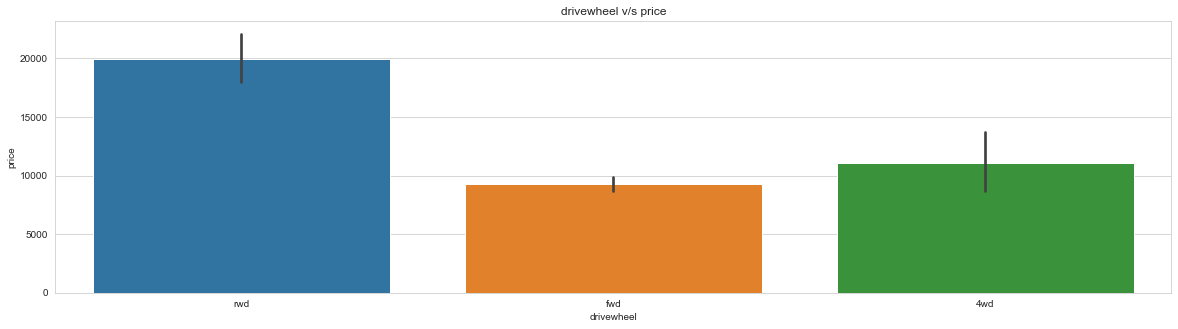

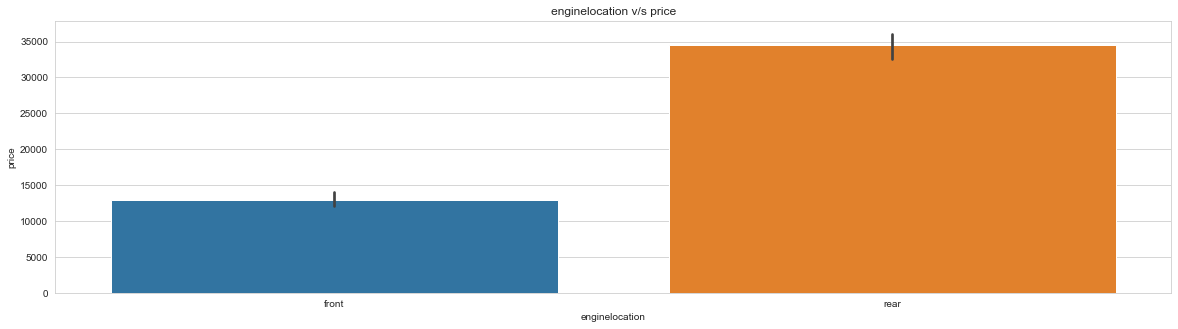

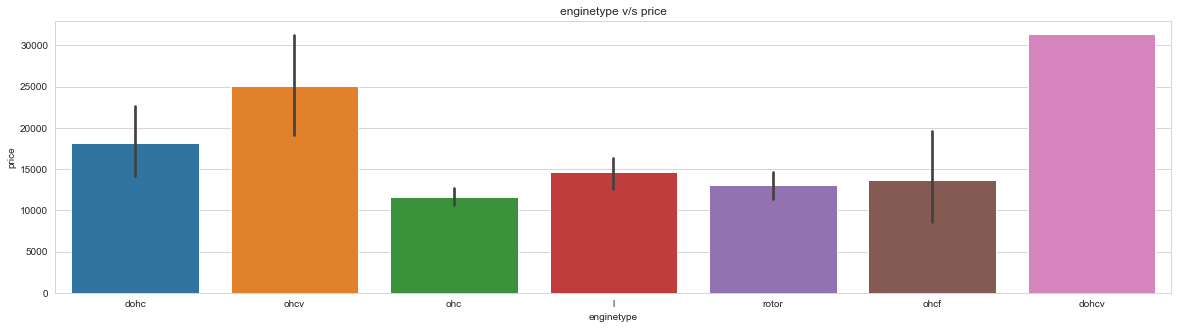

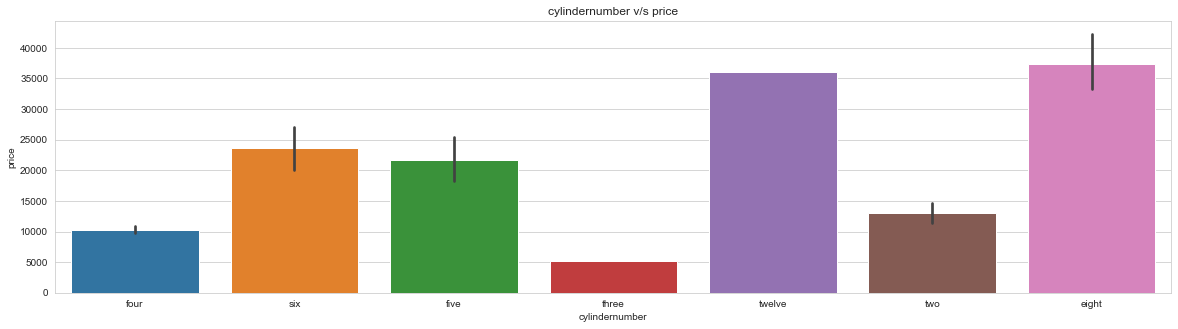

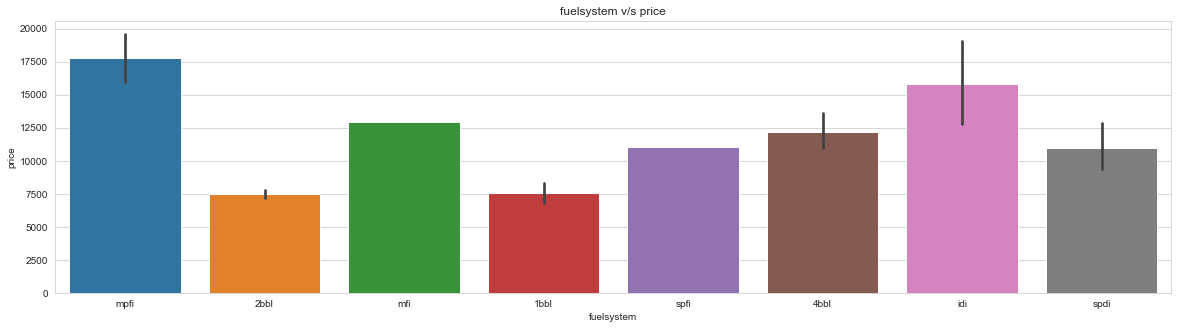

In [19]:
comparision_plot("company_name","price")
comparision_plot("fueltype","price")
comparision_plot("doornumber","price")
comparision_plot("carbody","price")
comparision_plot("drivewheel","price")
comparision_plot("enginelocation","price")
comparision_plot("enginetype","price")
comparision_plot("cylindernumber","price")
comparision_plot("fuelsystem","price")

- 'Jaguar' company's cars are the most expensive.
- The car with 'Diesel' are more expensive than 'Gas'.
- The car's having 'four' doors are more expensive than cars having 'two' doors.
- 'Hardtop' carbody is costliers than others.
- 'Rear Engine' cars are more costly than that of 'Front Engine'.
- The most expensive engine is 'dohcv'.
- Cars having 'eight cylinder' are more expensive than others
- 'mpfi' fuel system is the most expensive

## Converting categorical columns to numerical columns

In [20]:
df1=pd.get_dummies(data[['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','fuelsystem',"cylindernumber"]],drop_first=True)

In [21]:
df1

fueltype_gas  aspiration_turbo  doornumber_two  carbody_hardtop  \
0               1                 0               1                0   
1               1                 0               1                0   
2               1                 0               1                0   
3               1                 0               0                0   
4               1                 0               0                0   
..            ...               ...             ...              ...   
200             1                 0               0                0   
201             1                 1               0                0   
202             1                 0               0                0   
203             0                 1               0                0   
204             1                 1               0                0   

     carbody_hatchback  carbody_sedan  carbody_wagon  drivewheel_fwd  \
0                    0              0              0               0   
1                    0              0              0               0   
2                    1              0              0               0   
3                    0              1              0               1   
4                    0              1              0               0   
..                 ...            ...            ...             ...   
200                  0              1              0               0   
201                  0              1              0               0   
202                  0              1              0               0   
203                  0              1              0               0   
204                  0              1              0               0   

     drivewheel_rwd  enginelocation_rear  ...  fuelsystem_mfi  \
0                 1                    0  ...               0   
1                 1                    0  ...               0   
2                 1                    0  ...               0   
3                 0                    0  ...               0   
4                 0                    0  ...               0   
..              ...                  ...  ...             ...   
200               1                    0  ...               0   
201               1                    0  ...               0   
202               1                    0  ...               0   
203               1                    0  ...               0   
204               1                    0  ...               0   

     fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  cylindernumber_five  \
0                  1                0                0                    0   
1                  1                0                0                    0   
2                  1                0                0                    0   
3                  1                0                0                    0   
4                  1                0                0                    1   
..               ...              ...              ...                  ...   
200                1                0                0                    0   
201                1                0                0                    0   
202                1                0                0                    0   
203                0                0                0                    0   
204                1                0                0                    0   

     cylindernumber_four  cylindernumber_six  cylindernumber_three  \
0                      1                   0                     0   
1                      1                   0                     0   
2                      0                   1                     0   
3                      1                   0                     0   
4                      0                   0                     0   
..                   ...                 ...                   ...   
200                    1                   0           

In [22]:
data_new=pd.concat([data,df1],axis="columns")

In [23]:
data_new

symboling                      make company_name fueltype aspiration  \
0            3        alfa-romero giulia  alfa-romero      gas        std   
1            3       alfa-romero stelvio  alfa-romero      gas        std   
2            1  alfa-romero Quadrifoglio  alfa-romero      gas        std   
3            2               audi 100 ls         audi      gas        std   
4            2                audi 100ls         audi      gas        std   
..         ...                       ...          ...      ...        ...   
200         -1           volvo 145e (sw)        volvo      gas        std   
201         -1               volvo 144ea        volvo      gas      turbo   
202         -1               volvo 244dl        volvo      gas        std   
203         -1                 volvo 246        volvo   diesel      turbo   
204         -1               volvo 264gl        volvo      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88.6  ...   
1          two  convertible        rwd          front       88.6  ...   
2          two    hatchback        rwd          front       94.5  ...   
3         four        sedan        fwd          front       99.8  ...   
4         four        sedan        4wd          front       99.4  ...   
..         ...          ...        ...            ...        ...  ...   
200       four        sedan        rwd          front      109.1  ...   
201       four        sedan        rwd          front      109.1  ...   
202       four        sedan        rwd          front      109.1  ...   
203       four        sedan        rwd          front      109.1  ...   
204       four        sedan        rwd          front      109.1  ...   

     fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  \
0                 0                1                0                0   
1                 0                1                0                0   
2                 0                1                0                0   
3                 0                1                0                0   
4                 0                1                0                0   
..              ...              ...              ...              ...   
200               0                1                0                0   
201               0                1                0                0   
202               0                1                0                0   
203               0                0                0                0   
204               0                1                0                0   

    cylindernumber_five cylindernumber_four  cylindernumber_six  \
0                     0                   1                   0   
1                     0                   1                   0   
2                     0                   0                   1   
3                     0                   1                   0   
4                     1                   0                   0   
..                  ...                 ...                 ...   
200                   0                   1                   0   
201                   0                   1                   0   
202                   0                   0                   1   
203                   0                   0                   1   
204                   0                   1                   0   

    cylindernumber_three  cylindernumber_twelve  cylindernumber_two  
0                      0                      0                   0  
1                      0                      0                   0  
2                      0                      0                   0  
3                      0                      0                   0  
4                      0                      0                   0  
..                   ...                    ...                 ...  
200                

### Now to see the relation of price from numerical columns

In [24]:
num_col=["wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","horsepower"]
num_col

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'horsepower']

In [25]:
list(enumerate(num_col))

[(0, 'wheelbase'),
 (1, 'carlength'),
 (2, 'carwidth'),
 (3, 'carheight'),
 (4, 'curbweight'),
 (5, 'enginesize'),
 (6, 'boreratio'),
 (7, 'horsepower')]

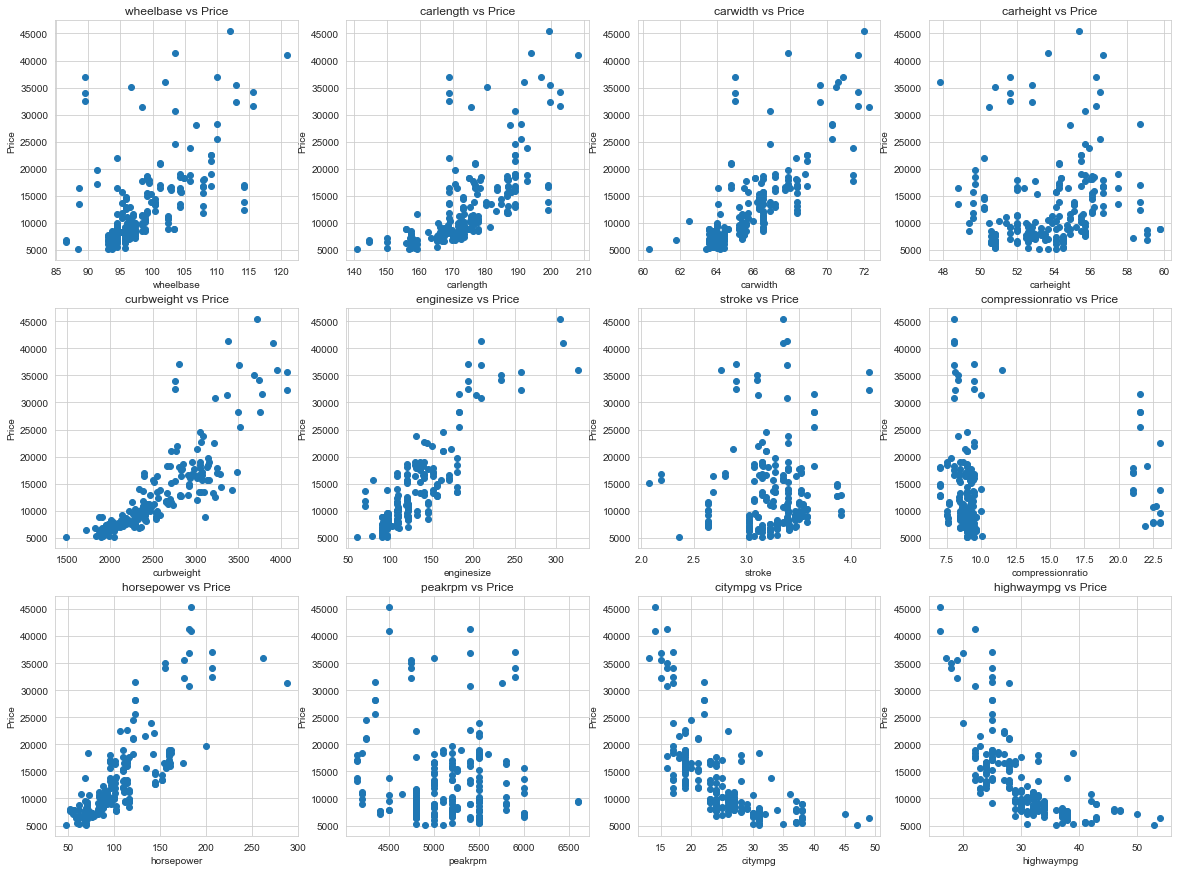

In [26]:
def scatter(x,fig):
    plt.subplot(3,4,fig)
    plt.scatter(data[x],data['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(20,15))

scatter('wheelbase', 1)
scatter('carlength', 2)
scatter('carwidth', 3)
scatter('carheight', 4)
scatter('curbweight', 5)
scatter('enginesize', 6)
scatter('stroke', 7)
scatter('compressionratio', 8)
scatter('horsepower', 9)
scatter('peakrpm', 10)
scatter('citympg', 11)
scatter('highwaympg', 12)

plt.show()

- carlength, carwidth, curbweight, horsepower, wheelbase, enginesize have a positive correlation with price
- Whereas highwaympg,citympg have a negative correlation with price
- There is no as such trend is showing between carheight,stroke,compressionratio,peakrpm and price

In [27]:
data.corr()

symboling  wheelbase  carlength  carwidth  carheight  \
symboling          1.000000  -0.531954  -0.357612 -0.232919  -0.541038   
wheelbase         -0.531954   1.000000   0.874587  0.795144   0.589435   
carlength         -0.357612   0.874587   1.000000  0.841118   0.491029   
carwidth          -0.232919   0.795144   0.841118  1.000000   0.279210   
carheight         -0.541038   0.589435   0.491029  0.279210   1.000000   
curbweight        -0.227691   0.776386   0.877728  0.867032   0.295572   
enginesize        -0.105790   0.569329   0.683360  0.735433   0.067149   
boreratio         -0.130051   0.488750   0.606454  0.559150   0.171071   
stroke            -0.008735   0.160959   0.129533  0.182942  -0.055307   
compressionratio  -0.178515   0.249786   0.158414  0.181129   0.261214   
horsepower         0.070873   0.353294   0.552623  0.640732  -0.108802   
peakrpm            0.273606  -0.360469  -0.287242 -0.220012  -0.320411   
citympg           -0.035823  -0.470414  -0.670909 -0.642704  -0.048640   
highwaympg         0.034606  -0.544082  -0.704662 -0.677218  -0.107358   
price             -0.079978   0.577816   0.682920  0.759325   0.119336   

                  curbweight  enginesize  boreratio    stroke  \
symboling          -0.227691   -0.105790  -0.130051 -0.008735   
wheelbase           0.776386    0.569329   0.488750  0.160959   
carlength           0.877728    0.683360   0.606454  0.129533   
carwidth            0.867032    0.735433   0.559150  0.182942   
carheight           0.295572    0.067149   0.171071 -0.055307   
curbweight          1.000000    0.850594   0.648480  0.168790   
enginesize          0.850594    1.000000   0.583774  0.203129   
boreratio           0.648480    0.583774   1.000000 -0.055909   
stroke              0.168790    0.203129  -0.055909  1.000000   
compressionratio    0.151362    0.028971   0.005197  0.186110   
horsepower          0.750739    0.809769   0.573677  0.080940   
peakrpm            -0.266243   -0.244660  -0.254976 -0.067964   
citympg            -0.757414   -0.653658  -0.584532 -0.042145   
highwaympg         -0.797465   -0.677470  -0.587012 -0.043931   
price               0.835305    0.874145   0.553173  0.079443   

                  compressionratio  horsepower   peakrpm   citympg  \
symboling                -0.178515    0.070873  0.273606 -0.035823   
wheelbase                 0.249786    0.353294 -0.360469 -0.470414   
carlength                 0.158414    0.552623 -0.287242 -0.670909   
carwidth                  0.181129    0.640732 -0.220012 -0.642704   
carheight                 0.261214   -0.108802 -0.320411 -0.048640   
curbweight                0.151362    0.750739 -0.266243 -0.757414   
enginesize                0.028971    0.809769 -0.244660 -0.653658   
boreratio                 0.005197    0.573677 -0.254976 -0.584532   
stroke                    0.186110    0.080940 -0.067964 -0.042145   
compressionratio          1.000000   -0.204326 -0.435741  0.324701   
horsepower               -0.204326    1.000000  0.131073 -0.801456   
peakrpm                  -0.435741    0.131073  1.000000 -0.113544   
citympg                   0.324701   -0.801456 -0.113544  1.000000   
highwaympg                0.265201   -0.770544 -0.054275  0.971337   
price                     0.067984    0.808139 -0.085267 -0.685751   

                  highwaympg     price  
symboling           0.034606 -0.079978  
wheelbase          -0.544082  0.577816  
carlength          -0.704662  0.682920  
carwidth           -0.677218  0.759325  
carheight          -0.107358  0.119336  
curbweight         -0.797465  0.835305  
enginesize         -0.677470  0.874145  
boreratio          -0.587012  0.553173  
stroke             -0.043931  0.079443  
compressionratio    0.265201  0.067984  
horsepower         -0.770544  0.808139  
peakrpm            -0.054275 -0.085267  
citympg             0.971337 -0.685751  
highwaympg          1.000000 -0.697599  
price              -0.697599  1.000000

### Correlation of price with numerical columns

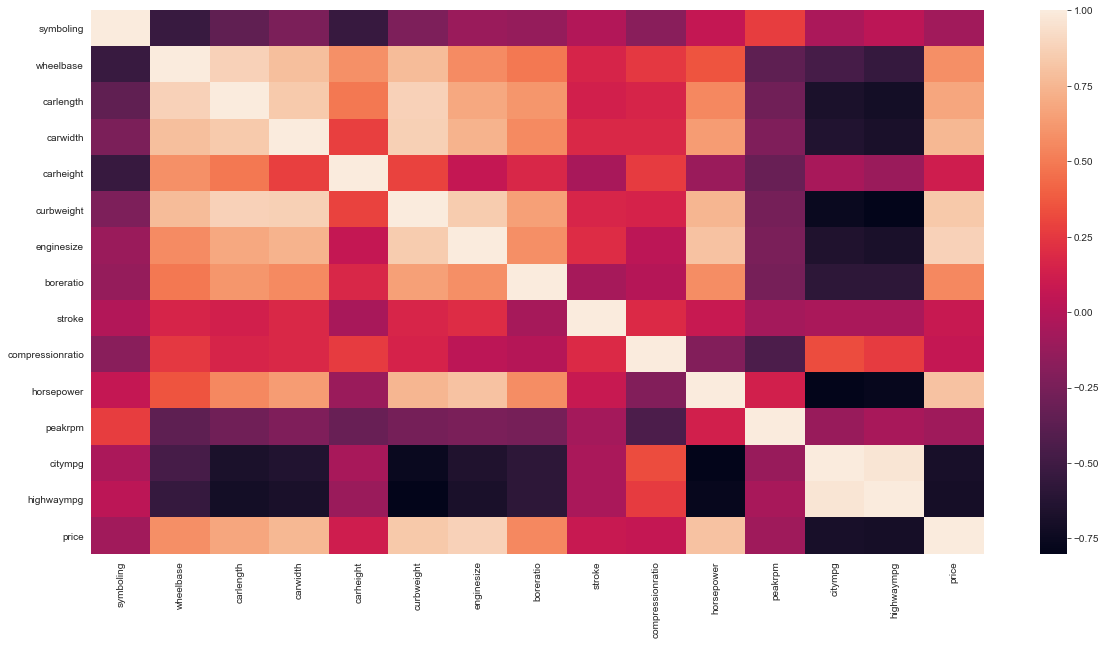

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr())

### Correlation of categorical columns with price 

In [29]:
df2=pd.concat([df1,data[["price"]]],axis="columns")

In [30]:
df2.corr()

fueltype_gas  aspiration_turbo  doornumber_two  \
fueltype_gas               1.000000         -0.401397        0.191491   
aspiration_turbo          -0.401397          1.000000       -0.031792   
doornumber_two             0.191491         -0.031792        1.000000   
carbody_hardtop           -0.018635         -0.029074        0.227793   
carbody_hatchback          0.202093          0.009786        0.606688   
carbody_sedan             -0.185623          0.017111       -0.515046   
carbody_wagon             -0.028183          0.018908       -0.329690   
drivewheel_fwd             0.090342         -0.145681       -0.033578   
drivewheel_rwd            -0.122035          0.112470        0.073958   
enginelocation_rear        0.040070         -0.057191        0.137757   
enginetype_dohcv           0.023020         -0.032857        0.079143   
enginetype_l              -0.268163          0.207156       -0.178718   
enginetype_ohc            -0.020584         -0.020162       -0.021404   
enginetype_ohcf            0.092384         -0.034450       -0.022095   
enginetype_ohcv            0.085556         -0.070070        0.052138   
enginetype_rotor           0.046383         -0.066203        0.159463   
fuelsystem_2bbl            0.226565         -0.323378       -0.020525   
fuelsystem_4bbl            0.040070         -0.057191        0.137757   
fuelsystem_idi            -1.000000          0.401397       -0.191491   
fuelsystem_mfi             0.023020          0.149190        0.079143   
fuelsystem_mpfi            0.302574         -0.050041       -0.025019   
fuelsystem_spdi            0.070457          0.394703        0.146272   
fuelsystem_spfi            0.023020         -0.032857        0.079143   
cylindernumber_five       -0.213527          0.225968       -0.079793   
cylindernumber_four        0.020184          0.009195       -0.066088   
cylindernumber_six         0.068594         -0.091987        0.014168   
cylindernumber_three       0.023020         -0.032857        0.079143   
cylindernumber_twelve      0.023020         -0.032857        0.079143   
cylindernumber_two         0.046383         -0.066203        0.159463   
price                     -0.105679          0.177926       -0.031835   

                       carbody_hardtop  carbody_hatchback  carbody_sedan  \
fueltype_gas                 -0.018635           0.202093      -0.185623   
aspiration_turbo             -0.029074           0.009786       0.017111   
doornumber_two                0.227793           0.606688      -0.515046   
carbody_hardtop               1.000000          -0.145109      -0.189119   
carbody_hatchback            -0.145109           1.000000      -0.675779   
carbody_sedan                -0.189119          -0.675779       1.000000   
carbody_wagon                -0.075101          -0.268359      -0.349749   
drivewheel_fwd               -0.188308           0.167552       0.015971   
drivewheel_rwd                0.210390          -0.148046       0.008293   
enginelocation_rear           0.394978          -0.087754      -0.114369   
enginetype_dohcv             -0.014109           0.097231      -0.065706   
enginetype_l                 -0.050249          -0.135734       0.057487   
enginetype_ohc               -0.043606           0.056560       0.080571   
enginetype_ohcf               0.136835          -0.083821      -0.075994   
enginetype_ohcv               0.050924          -0.018531      -0.003522   
enginetype_rotor             -0.028428           0.195907      -0.132390   
fuelsystem_2bbl              -0.084946           0.120288      -0.060830   
fuelsystem_4bbl              -0.024558           0.169240      -0.114369   
fuelsystem_idi                0.018635          -0.202093       0.185623   
fuelsystem_mfi               -0.014109           0.097231      -0.065706   
fuelsystem_mpfi               0.117876          -0.208463       0.078094   
fuelsystem_spdi              -0.043182           0.197165      -0.105671   
fuelsystem_

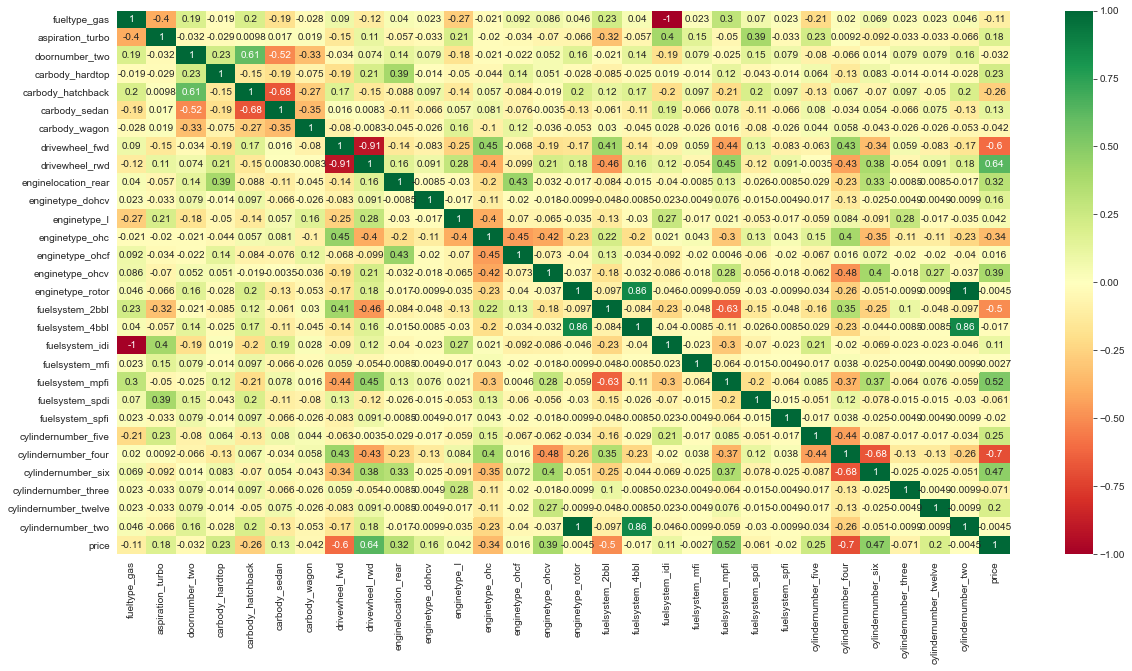

In [31]:
df2=pd.concat([df1,data[["price"]]],axis="columns")
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr(), cmap='RdYlGn',annot=True)

In [32]:
data_new.corr().price.sort_values(ascending=False)

price                    1.000000
enginesize               0.874145
curbweight               0.835305
horsepower               0.808139
carwidth                 0.759325
carlength                0.682920
drivewheel_rwd           0.638957
wheelbase                0.577816
boreratio                0.553173
fuelsystem_mpfi          0.517075
cylindernumber_six       0.474978
enginetype_ohcv          0.385991
enginelocation_rear      0.324973
cylindernumber_five      0.249606
carbody_hardtop          0.225854
cylindernumber_twelve    0.199634
aspiration_turbo         0.177926
enginetype_dohcv         0.159225
carbody_sedan            0.125716
carheight                0.119336
fuelsystem_idi           0.105679
stroke                   0.079443
compressionratio         0.067984
enginetype_l             0.042267
enginetype_ohcf          0.016285
fuelsystem_mfi          -0.002747
enginetype_rotor        -0.004544
cylindernumber_two      -0.004544
fuelsystem_4bbl         -0.017306
fuelsystem_spf

- <font color="red">'enginesize','curbweight','horsepower','carwidth','carlength','drivewheel_rwd','wheelbase','boreratio','fuelsystem_mpfi' has correlation over .50 with price.</font> 

## Linear regression and Train_Test_Split

In [33]:
y=data_new[["price"]]

In [34]:
x=data_new[["curbweight"]]

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(x_train,y_train)

LinearRegression()

In [40]:
y_pred=lr.predict(x_test)

In [41]:
line=lr.coef_*x+lr.intercept_

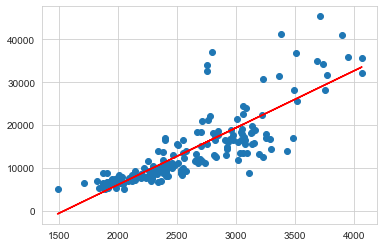

In [42]:
plt.scatter(x,y)
plt.plot(x,line,color="red")
plt.show()

- The red line in the above graph is showing linear regression line 

In [43]:
y_test.head()

price
131   9895.0
117  18150.0
63   10795.0
56   11845.0
49   36000.0

In [44]:
y_pred[0:5]

array([[12202.22203109],
       [21112.35066688],
       [11976.14414033],
       [11138.32607458],
       [32017.28422112]])

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
mean_squared_error(y_test,y_pred)

18393261.898447696

- So here we can see that the best feature for making a simple linear regression model is "curbweight".

## R square

In [47]:
y_test.head()

price
131   9895.0
117  18150.0
63   10795.0
56   11845.0
49   36000.0

In [48]:
y_pred[0:5]

array([[12202.22203109],
       [21112.35066688],
       [11976.14414033],
       [11138.32607458],
       [32017.28422112]])

In [49]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7102498997530408

- So the R square percentage we got is <font color="red">71.02498997530408 %</font>

## Multiple Regression Model

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [51]:
data_new.columns

Index(['symboling', 'make', 'company_name', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueltype_gas', 'aspiration_turbo', 'doornumber_two',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', '

In [52]:
data_new.drop(["symboling","make","company_name","fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","fuelsystem","cylindernumber"],axis=1,inplace=True)
data_new.head()

wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0       88.6      168.8      64.1       48.8        2548         130   
1       88.6      168.8      64.1       48.8        2548         130   
2       94.5      171.2      65.5       52.4        2823         152   
3       99.8      176.6      66.2       54.3        2337         109   
4       99.4      176.6      66.4       54.3        2824         136   

   boreratio  stroke  compressionratio  horsepower  ...  fuelsystem_mfi  \
0       3.47    2.68               9.0         111  ...               0   
1       3.47    2.68               9.0         111  ...               0   
2       2.68    3.47               9.0         154  ...               0   
3       3.19    3.40              10.0         102  ...               0   
4       3.19    3.40               8.0         115  ...               0   

   fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  cylindernumber_five  \
0                1                0                0                    0   
1                1                0                0                    0   
2                1                0                0                    0   
3                1                0                0                    0   
4                1                0                0                    1   

   cylindernumber_four  cylindernumber_six  cylindernumber_three  \
0                    1                   0                     0   
1                    1                   0                     0   
2                    0                   1                     0   
3                    1                   0                     0   
4                    0                   0                     0   

   cylindernumber_twelve  cylindernumber_two  
0                      0                   0  
1                      0                   0  
2                      0                   0  
3                      0                   0  
4                      0                   0  

[5 rows x 43 columns]

In [53]:
data_new.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [54]:
x=data_new.drop(["price"],axis=1).values

In [55]:
x

array([[ 88.6, 168.8,  64.1, ...,   0. ,   0. ,   0. ],
       [ 88.6, 168.8,  64.1, ...,   0. ,   0. ,   0. ],
       [ 94.5, 171.2,  65.5, ...,   0. ,   0. ,   0. ],
       ...,
       [109.1, 188.8,  68.9, ...,   0. ,   0. ,   0. ],
       [109.1, 188.8,  68.9, ...,   0. ,   0. ,   0. ],
       [109.1, 188.8,  68.9, ...,   0. ,   0. ,   0. ]])

In [56]:
y=data_new["price"].values

In [57]:
y

array([13495.   , 16500.   , 16500.   , 13950.   , 17450.   , 15250.   ,
       17710.   , 18920.   , 23875.   , 17859.167, 16430.   , 16925.   ,
       20970.   , 21105.   , 24565.   , 30760.   , 41315.   , 36880.   ,
        5151.   ,  6295.   ,  6575.   ,  5572.   ,  6377.   ,  7957.   ,
        6229.   ,  6692.   ,  7609.   ,  8558.   ,  8921.   , 12964.   ,
        6479.   ,  6855.   ,  5399.   ,  6529.   ,  7129.   ,  7295.   ,
        7295.   ,  7895.   ,  9095.   ,  8845.   , 10295.   , 12945.   ,
       10345.   ,  6785.   ,  8916.5  ,  8916.5  , 11048.   , 32250.   ,
       35550.   , 36000.   ,  5195.   ,  6095.   ,  6795.   ,  6695.   ,
        7395.   , 10945.   , 11845.   , 13645.   , 15645.   ,  8845.   ,
        8495.   , 10595.   , 10245.   , 10795.   , 11245.   , 18280.   ,
       18344.   , 25552.   , 28248.   , 28176.   , 31600.   , 34184.   ,
       35056.   , 40960.   , 45400.   , 16503.   ,  5389.   ,  6189.   ,
        6669.   ,  7689.   ,  9959.   ,  8499.   , 

<h3><font color="blue"> Recursive Feature Elimination</font></h3>

In [58]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [59]:
#from sklearn.feature_selection import RFECV
#from sklearn.model_selection import StratifiedKFold
#from sklearn.ensemble import RandomForestClassifier

In [60]:
#lr2=LinearRegression()

In [61]:
#lr2.fit(x_train,y_train)

In [62]:
#y_pred2=lr2.predict(x_test)

In [63]:
#from sklearn.feature_selection import RFE

In [64]:
#select=RFE(RandomForestClassifier(n_estimators=100,random_state=10),n_features_to_select=10)

In [65]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
data_new_train, data_new_test = train_test_split(data_new, train_size = 0.7, test_size = 0.3, random_state = 100)

In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower', 'price']

data_new_train[num_vars] = scaler.fit_transform(data_new_train[num_vars])

print(data_new_train[num_vars].head())

     wheelbase  carlength  carwidth  curbweight  enginesize  boreratio  \
122   0.244828   0.426016  0.291667    0.272692    0.139623   0.230159   
125   0.272414   0.452033  0.666667    0.500388    0.339623   1.000000   
166   0.272414   0.448780  0.308333    0.314973    0.139623   0.444444   
1     0.068966   0.450407  0.316667    0.411171    0.260377   0.626984   
199   0.610345   0.775610  0.575000    0.647401    0.260377   0.746032   

     horsepower     price  
122    0.083333  0.068818  
125    0.395833  0.466890  
166    0.266667  0.122110  
1      0.262500  0.314446  
199    0.475000  0.382131  


<ipython-input-66-2213814f756d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new_train[num_vars] = scaler.fit_transform(data_new_train[num_vars])
C:\Users\honey\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [67]:
data_new_train.head()

wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
122   0.244828   0.426016  0.291667       50.8    0.272692    0.139623   
125   0.272414   0.452033  0.666667       50.2    0.500388    0.339623   
166   0.272414   0.448780  0.308333       52.6    0.314973    0.139623   
1     0.068966   0.450407  0.316667       48.8    0.411171    0.260377   
199   0.610345   0.775610  0.575000       57.5    0.647401    0.260377   

     boreratio  stroke  compressionratio  horsepower  ...  fuelsystem_mfi  \
122   0.230159    3.23               9.4    0.083333  ...               0   
125   1.000000    3.11               9.5    0.395833  ...               0   
166   0.444444    3.08               9.4    0.266667  ...               0   
1     0.626984    2.68               9.0    0.262500  ...               0   
199   0.746032    3.15               7.5    0.475000  ...               0   

     fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  cylindernumber_five  \
122                0                0                0                    0   
125                1                0                0                    0   
166                1                0                0                    0   
1                  1                0                0                    0   
199                1                0                0                    0   

     cylindernumber_four  cylindernumber_six  cylindernumber_three  \
122                    1                   0                     0   
125                    1                   0                     0   
166                    1                   0                     0   
1                      1                   0                     0   
199                    1                   0                     0   

     cylindernumber_twelve  cylindernumber_two  
122                      0                   0  
125                      0                   0  
166                      0                   0  
1                        0                   0  
199                      0                   0  

[5 rows x 43 columns]

In [68]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

In [69]:
y_train = data_new_train.pop('price')
x_train = data_new_train

In [70]:
multi_model = LinearRegression()
multi_model.fit(x_train, y_train)
rfe = RFE(multi_model, 10)          
rfe = rfe.fit(x_train, y_train)

C:\Users\honey\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [71]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 10),
 ('carlength', False, 8),
 ('carwidth', True, 1),
 ('carheight', False, 30),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 29),
 ('horsepower', False, 3),
 ('peakrpm', False, 31),
 ('citympg', False, 26),
 ('highwaympg', False, 25),
 ('fueltype_gas', False, 6),
 ('aspiration_turbo', False, 17),
 ('doornumber_two', False, 19),
 ('carbody_hardtop', False, 12),
 ('carbody_hatchback', False, 11),
 ('carbody_sedan', False, 14),
 ('carbody_wagon', False, 13),
 ('drivewheel_fwd', False, 24),
 ('drivewheel_rwd', False, 18),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 5),
 ('enginetype_l', False, 27),
 ('enginetype_ohc', False, 4),
 ('enginetype_ohcf', False, 15),
 ('enginetype_ohcv', True, 1),
 ('enginetype_rotor', True, 1),
 ('fuelsystem_2bbl', False, 20),
 ('fuelsystem_4bbl', False, 23),
 ('fuelsystem_idi', False, 16),
 ('fuelsystem_mfi', False, 33),
 ('fuelsystem_

In [72]:
x_train.columns[rfe.support_]

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'enginelocation_rear', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_three', 'cylindernumber_twelve'],
      dtype='object')

In [73]:
x_train_rfe=x_train[x_train.columns[rfe.support_]]
x_train_rfe.head()

carwidth  curbweight  enginesize  boreratio  stroke  enginelocation_rear  \
122  0.291667    0.272692    0.139623   0.230159    3.23                    0   
125  0.666667    0.500388    0.339623   1.000000    3.11                    0   
166  0.308333    0.314973    0.139623   0.444444    3.08                    0   
1    0.316667    0.411171    0.260377   0.626984    2.68                    0   
199  0.575000    0.647401    0.260377   0.746032    3.15                    0   

     enginetype_ohcv  enginetype_rotor  cylindernumber_three  \
122                0                 0                     0   
125                0                 0                     0   
166                0                 0                     0   
1                  0                 0                     0   
199                0                 0                     0   

     cylindernumber_twelve  
122                      0  
125                      0  
166                      0  
1                        0  
199                      0

In [74]:
col = x_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'enginelocation_rear', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_three', 'cylindernumber_twelve'],
      dtype='object')

### Model Building

In [75]:
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error
lin_model = lm.LinearRegression()

In [77]:
x=data_new[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'horsepower', 'carbody_hardtop', 'carbody_hatchback',
       'enginelocation_rear', 'enginetype_rotor']]
x.head()

wheelbase  carlength  carwidth  curbweight  enginesize  horsepower  \
0       88.6      168.8      64.1        2548         130         111   
1       88.6      168.8      64.1        2548         130         111   
2       94.5      171.2      65.5        2823         152         154   
3       99.8      176.6      66.2        2337         109         102   
4       99.4      176.6      66.4        2824         136         115   

   carbody_hardtop  carbody_hatchback  enginelocation_rear  enginetype_rotor  
0                0                  0                    0                 0  
1                0                  0                    0                 0  
2                0                  1                    0                 0  
3                0                  0                    0                 0  
4                0                  0                    0                 0

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [79]:
lr = lin_model.fit(x,y)
lr

LinearRegression()

In [80]:
lr.score(x, y)

0.8704280476621999

- Slope

In [81]:
lr.coef_

array([ 1.70701738e+02, -1.24353692e+02,  8.53216648e+02,  2.44536777e+00,
        8.92151113e+01,  3.20564263e+01, -1.22085531e+03, -1.63968860e+03,
        1.36848985e+04,  6.27184076e+03])

- Intercept

In [82]:
lr.intercept_

-58795.25489218188

In [83]:
y_pred = [lr.predict(x)]
print('Predicted Car price are:\n', y_pred)

Predicted Car price are:
 [array([11416.22787561, 11416.22787561, 15693.36889829, 11471.88573044,
       15590.68401685, 14551.1317479 , 18835.78916056, 19104.77961536,
       19943.18539301, 16605.377506  , 10512.05391091, 10512.05391091,
       16919.51951893, 17054.01474633, 18430.42531302, 24828.48668618,
       25451.61077706, 29028.56117603,  -822.71442882,  5430.13803375,
        6794.78879318,  5230.90268662,  5230.90268662,  7650.77474921,
        5453.43115377,  7146.91783984,  7146.91783984,  9444.52151389,
       12148.0918593 , 16405.22546127,  5142.80491579,  5979.02957263,
        4976.14099208,  6900.71314033,  6939.83902466,  7523.20286949,
        8255.54461493,  8876.6134969 ,  9006.21798875,  9700.19293128,
        7562.79298932, 10574.74353666, 11588.0854339 ,  6921.63569442,
        7069.82662886,  7155.41450084, 10306.01365409, 33659.21836472,
       33659.21836472, 42156.92763186,  5369.38191702,  5393.83559473,
        5406.06243358,  6186.04230884,  6198.26914

In [84]:
y_test

array([ 6795. , 15750. , 15250. ,  5151. ,  9995. , 11199. ,  5389. ,
        7898. , 17199. ,  6529. , 20970. , 31400.5, 10945. , 18344. ,
        8916.5,  9989. ,  9295. , 18920. ,  7895. ,  6488. ,  9959. ,
       15580. ,  9895. , 11549. , 15998. ,  5118. ,  6938. , 16695. ,
        8358. ,  5499. ,  7975. , 12290. , 22018. ,  8948. ,  6849. ,
       41315. , 11595. , 18150. ,  6377. , 45400. ,  8916.5, 17450. ,
       34184. , 15040. , 11259. ,  7609. ,  7609. , 14869. , 11694. ,
        8495. , 23875. ,  7099. ,  8058. , 10595. , 16503. , 18399. ,
       10795. , 18420. ,  9960. ,  6229. ,  6479. , 15510. ])

In [88]:
r2=lr.score(x_test,y_test)
print(r2*100,'%')
print('Relationship between independent vars and Price is', round(r2*100,2), '%')

84.77374744224049 %
Relationship between independent vars and Price is 84.77 %


In [89]:
# OLS = Ordinary Least Squares
import statsmodels.api as sm
model = sm.OLS(y, x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              479.4
Date:                Sun, 28 Mar 2021   Prob (F-statistic):                   1.87e-131
Time:                        14:07:15   Log-Likelihood:                         -1936.3
No. Observations:                 205   AIC:                                      3893.
Df Residuals:                     195   BIC:                                      3926.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

## Prediction

<h3><font color="green">'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','horsepower', 'carbody_hardtop' , 'carbody_hatchback', 'enginelocation_rear' , 'enginetype_rotor' are the features on which price of the car depends the most</font></h3> 